In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
final_invoice=pd.read_csv('cleaned_finalinvoice.csv')
final_invoice.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,...,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month
0,0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,...,4051.95000,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12
1,1,Retail,84419,NaN,2015-01-03,173997,2015-01-02,14:12:18,78584,804.26,...,1001.29000,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,thane,maharashtra,2015,1
2,2,Retail,81055,NaN,2015-01-03,173889,2015-01-02,11:40:44,33985,180.19,...,233.14000,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,thane,maharashtra,2015,1
3,3,Retail,84419,NaN,2015-01-03,174158,2015-01-03,10:12:32,78584,0.00,...,1674.22433,1644.70,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,thane,maharashtra,2015,1
4,4,Retail,18980,NaN,2015-01-03,173860,2015-01-02,10:45:42,50057,1202.97,...,2747.12000,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,thane,maharashtra,2015,1


In [42]:
final_invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Insurance Company',
       'Invoice Date', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice_DateTime',
       'JobCard_DateTime', 'Service_Time', 'City', 'State', 'Year', 'Month'],
      dtype='object')

In [47]:
final_invoice = final_invoice.rename(columns={'Order Type':'Order_Type','Total Amt Wtd Tax.': 'Total_Amt_Wtd_Tax','Labour Total':'Labour_Total'})

# What are the different types of services provided?

In [48]:
final_invoice['Order_Type'].value_counts()

Running Repairs      265365
Paid Service         129352
Accidental            43043
SMC Redemption        15603
Mechanical            14809
SMC Value Package      9693
Repeat Order             27
Workshop Damage          17
WBW Order                16
Name: Order_Type, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


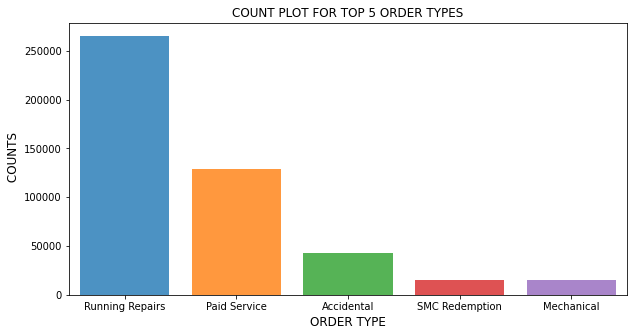

In [51]:

oredr_type_counts  = final_invoice['Order_Type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(oredr_type_counts.index[:5], oredr_type_counts.values[:5], alpha=0.8,saturation=50)
plt.title('COUNT PLOT FOR TOP 5 ORDER TYPES')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.show()

# What is the difference in each service/labour costing?

In [52]:
final_invoice.groupby('Order_Type')['Labour_Total'].sum().sort_values( ascending=False)

Order_Type
Running Repairs      2.113605e+08
Accidental           2.106917e+08
Paid Service         1.998620e+08
Mechanical           1.609265e+07
SMC Value Package    1.514294e+07
SMC Redemption       7.124159e+05
WBW Order            2.698875e+04
Repeat Order         9.000000e+02
Workshop Damage      0.000000e+00
Name: Labour_Total, dtype: float64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


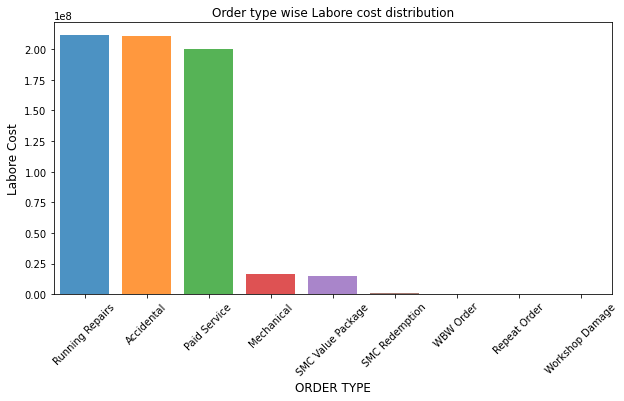

In [54]:
b=final_invoice.groupby('Order_Type')['Labour_Total'].sum().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Order type wise Labore cost distribution')
plt.ylabel('Labore Cost', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Is the service seasonal or regular?

In [55]:
df=final_invoice.loc[final_invoice['Order_Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]

<AxesSubplot:xlabel='Month'>

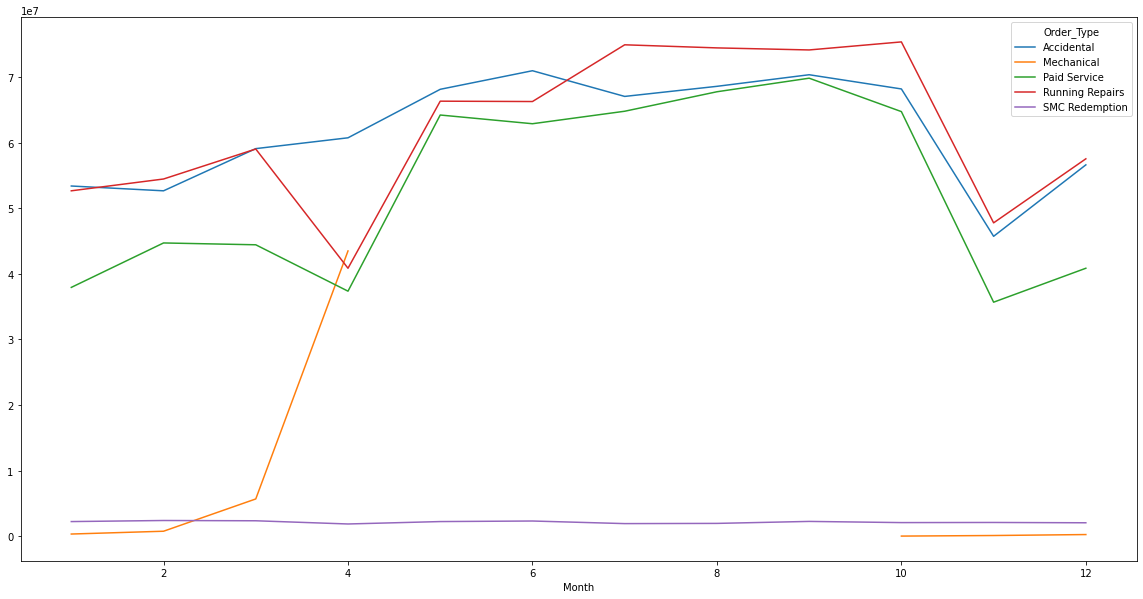

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

df.groupby(['Month','Order_Type']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

In [101]:

# sns.set(style="darkgrid")
# fig, ax = plt.subplots(figsize=(20, 5))
# sns.countplot(x="Month", data=df, hue='Order_Type')
# plt.xlim(-1, 15)
# plt.legend(loc='upper right')
# plt.xticks(rotation='vertical')
# plt.show()

In [98]:
df.groupby(['Month','Order_Type']).size().unstack()

Order_Type,Accidental,Mechanical,Paid Service,Running Repairs,SMC Redemption
Month,,,,,
1,1134.0,10.0,3535.0,8348.0,723.0
2,1254.0,35.0,4120.0,9119.0,788.0
3,1380.0,362.0,4351.0,9069.0,802.0
4,1420.0,5979.0,3496.0,5646.0,598.0
5,1637.0,NaN,6110.0,9729.0,728.0
6,1639.0,NaN,5891.0,9907.0,767.0
7,1501.0,NaN,6104.0,12384.0,650.0
8,1587.0,NaN,6432.0,10966.0,667.0
9,1771.0,NaN,6635.0,11682.0,781.0


<AxesSubplot:xlabel='Month'>

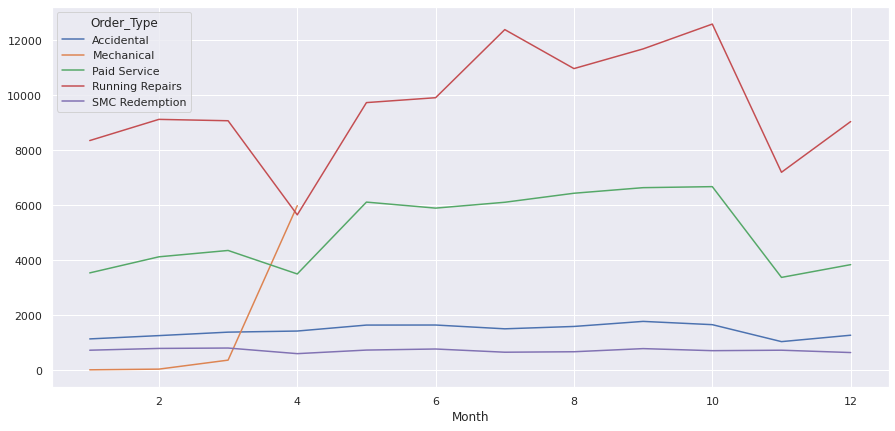

In [100]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Month','Order_Type']).size().unstack().plot(ax=ax)

# Which service is popular regarding a certain make?

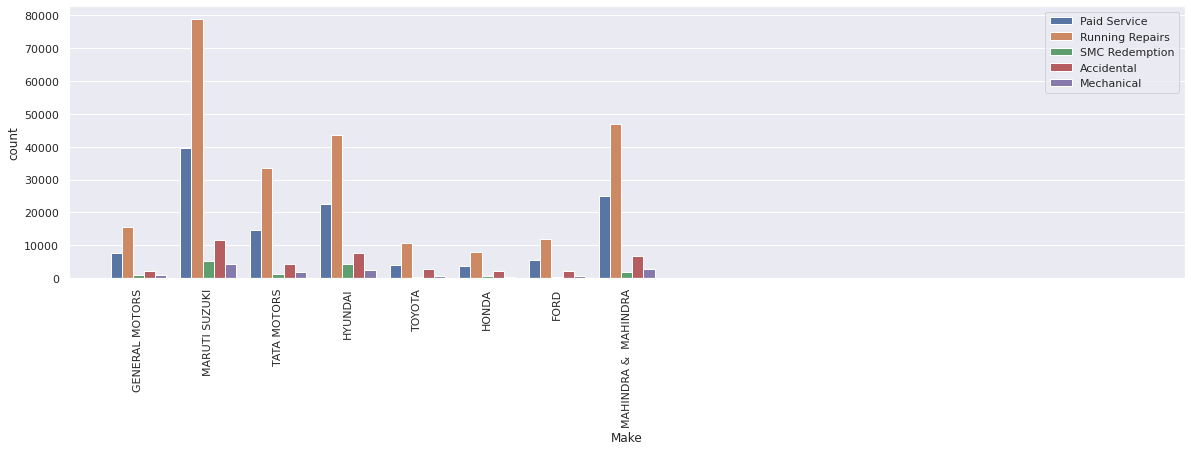

In [86]:
df=final_invoice.loc[final_invoice['Order_Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df=df.loc[df['Make'].isin(['MARUTI SUZUKI', 'MAHINDRA &  MAHINDRA', 'HYUNDAI', 'TATA MOTORS',
       'GENERAL MOTORS', 'FORD', 'TOYOTA', 'HONDA'])]

# df=df.loc[df.State.isin(['maharashtra','tamil nadu','karnataka','uttar pradesh','telangana'])]


sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Make", data=df, hue='Order_Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

 Running Repairs is most  popular service for all top make

In [99]:
df.groupby(['Make','Order_Type']).size().unstack()

Order_Type,Accidental,Mechanical,Paid Service,Running Repairs,SMC Redemption
Make,,,,,
BMW,NaN,NaN,NaN,1.0,NaN
FIAT,5.0,NaN,6.0,19.0,4.0
FORD,7.0,NaN,20.0,43.0,NaN
GENERAL MOTORS,7.0,1.0,12.0,55.0,5.0
HONDA,4.0,1.0,8.0,29.0,3.0
HYUNDAI,3688.0,1202.0,13051.0,22910.0,2901.0
MAHINDRA & MAHINDRA,3662.0,1707.0,14981.0,29007.0,1311.0
MARUTI SUZUKI,8567.0,2941.0,27239.0,51901.0,3910.0
NISSAN,NaN,NaN,2.0,1.0,NaN


# Which service is popular regarding a certain car?

In [90]:
final_invoice.Model.value_counts().sort_values( ascending=False)[:10].keys()

Index(['SWIFT', 'ALTO', 'SANTRO', 'SCORPIO CRDE', 'WAGONR', 'I10', 'INDICA',
       'SWIFT DZIRE', 'BOLERO', 'XYLO'],
      dtype='object')

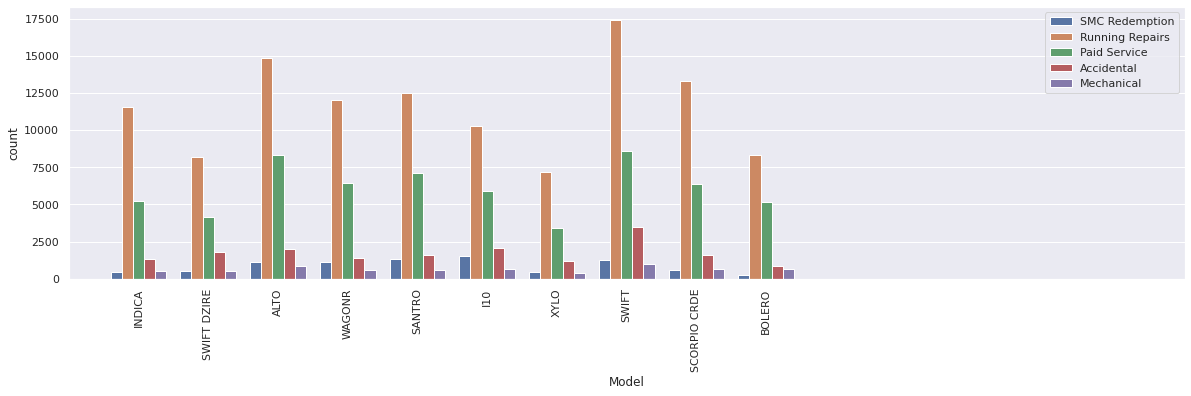

In [91]:
df=final_invoice.loc[final_invoice['Order_Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df=df.loc[df['Model'].isin(['SWIFT', 'ALTO', 'SANTRO', 'SCORPIO CRDE', 'WAGONR', 'I10', 'INDICA',
       'SWIFT DZIRE', 'BOLERO', 'XYLO'])]

# df=df.loc[df.State.isin(['maharashtra','tamil nadu','karnataka','uttar pradesh','telangana'])]


sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Model", data=df, hue='Order_Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [92]:
df.groupby(['Model','Order_Type']).size()

Model         Order_Type     
ALTO          Accidental          2027
              Mechanical           838
              Paid Service        8304
              Running Repairs    14874
              SMC Redemption      1103
BOLERO        Accidental           864
              Mechanical           641
              Paid Service        5131
              Running Repairs     8322
              SMC Redemption       234
I10           Accidental          2077
              Mechanical           626
              Paid Service        5882
              Running Repairs    10287
              SMC Redemption      1531
INDICA        Accidental          1317
              Mechanical           536
              Paid Service        5192
              Running Repairs    11552
              SMC Redemption       420
SANTRO        Accidental          1592
              Mechanical           575
              Paid Service        7115
              Running Repairs    12494
              SMC Redemption      

In [93]:
df1=df.groupby(['Year','Model']).Total_Amt_Wtd_Tax.sum().unstack()
df1

Model,ALTO,BOLERO,I10,INDICA,SANTRO,SCORPIO CRDE,SWIFT,SWIFT DZIRE,WAGONR,XYLO
Year,,,,,,,,,,
2012,3.136314e+06,3.057132e+06,1.713629e+06,5.764159e+06,4.574364e+06,7.892486e+06,3.812822e+06,8.990165e+05,2.649300e+06,2.528495e+06
2013,9.970174e+06,8.500655e+06,6.471819e+06,1.211189e+07,1.228076e+07,1.948969e+07,1.608303e+07,4.201185e+06,8.348378e+06,1.080433e+07
2014,1.833128e+07,1.403865e+07,1.619640e+07,1.529238e+07,2.132694e+07,3.636513e+07,2.554514e+07,8.705818e+06,1.685329e+07,2.035886e+07
2015,2.280342e+07,2.279854e+07,2.373882e+07,2.146806e+07,2.409380e+07,4.578502e+07,3.757381e+07,1.923553e+07,2.090165e+07,2.661788e+07
2016,3.103029e+07,5.219227e+07,2.594830e+07,2.523657e+07,2.123003e+07,5.303754e+07,5.179795e+07,3.172438e+07,2.154170e+07,2.812007e+07


<AxesSubplot:xlabel='Month'>

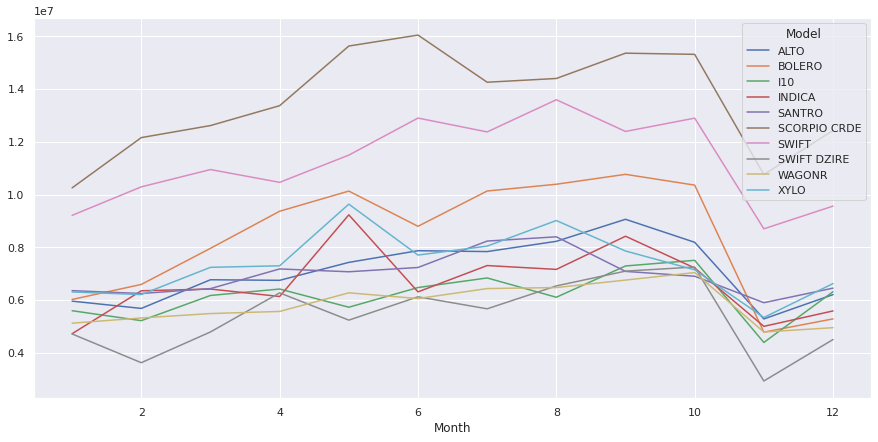

In [95]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Month','Model']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)